In [1]:
!pip install TensorFlow
!pip install Keras
!pip install pillow
!pip install NumPy
!Pip install tqdm
!Pip install jupyterlab

In [5]:
import numpy as np
from PIL import Image
import os
import string
from pickle import dump, load
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Add
from tqdm.notebook import tqdm



# Data Preprocessing for text doc

In [9]:
def load_fp(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text
# get all images with their captions

def img_capt(filename):
    file = load_fp(filename)
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('.jpg,')
        if img[:] not in descriptions:
            descriptions[img[:]] = [ caption ]
        else:
            descriptions[img[:]].append(caption)
    return descriptions
    
#Data cleaning function will convert all upper case alphabets to lowercase, removing punctuations and words containing numbers
def txt_clean(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):
            img_caption.replace("-"," ")
            descp = img_caption.split()
            #uppercase to lowercase
            descp = [wrd.lower() for wrd in descp]
            #remove punctuation from each token
            descp = [wrd.translate(table) for wrd in descp]
            #remove hanging 's and a
            descp = [wrd for wrd in descp if(len(wrd)>1)]
            #remove words containing numbers with them
            descp = [wrd for wrd in descp if(wrd.isalpha())]
            #converting back to string
            img_caption = ' '.join(descp)
            captions[img][i]= img_caption
    return captions
    
def txt_vocab(descriptions):
  # To build vocab of all unique words
    vocab = set()
    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]
    return vocab
#To save all descriptions in one file

import os

def save_descriptions(descriptions, filename):
    lines = []
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(f"{key}.jpg {desc}")
    
    #print(lines)
    #print(len(lines))
    data = "\n".join(lines)
    #print(data)
    with open(filename, "w") as file:
        file.write(data)
        #print('done')

# Set these paths according to the project folder in your system
dataset_text = "C://Users/harsh/Desktop/image_caption_generator/dataset/"
dataset_images = "C://Users/harsh/Desktop/image_caption_generator/dataset/Images"

# To prepare our text data
filename = os.path.join(dataset_text, "captions.txt")

# Loading the file that contains all data
# Map them into descriptions dictionary 
descriptions = img_capt(filename)
print("Length of descriptions =", len(descriptions))

# Cleaning the descriptions
clean_descriptions = txt_clean(descriptions)

# To build vocabulary
vocabulary = txt_vocab(clean_descriptions)
print("Length of vocabulary =", len(vocabulary))

# Specify the full path to save the descriptions


# Saving all descriptions in one file
save_descriptions(clean_descriptions, "descriptions.txt")


Length of descriptions = 8091
Length of vocabulary = 8763


# feature extraction using pre trained model 

In [ ]:

def extract_features(directory):
    model = Xception(include_top=False, pooling='avg')
    features = {}
    for pic in tqdm(os.listdir(directory)):
        file = os.path.join(directory, pic)
        image = Image.open(file)
        image = image.resize((299, 299))
        image = np.expand_dims(image, axis=0)
        image = image / 127.5
        image = image - 1.0
        feature = model.predict(image)
        features[pic] = feature
    return features

# Set the dataset_images path according to your project folder in your system
dataset_images = "C://Users/harsh/Desktop/image_caption_generator/dataset/Images"

# Extract features from images and save to a pickle file
features = extract_features(dataset_images)
with open("features.p", "wb") as f:
    dump(features, f)

# To directly load the features from the pickle file
features = load(open("features.p", "rb"))




  0%|          | 0/8091 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

# Loading the cleaned text doc 

In [2]:
import os
def load_doc(filename):
    """Load a document and return its content as a string."""
    with open(filename, 'r') as file:
        text = file.read()
    return text

def load_photos(filename):
    """Load a list of photo identifiers from a text file."""
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    #print(photos)
    return photos

def load_clean_descriptions(filename, photos):
    """Load clean descriptions and filter by given photo identifiers."""
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):
        #print(line)
        words = line.split()
        #print(words)
        
        if len(words) < 1:
            continue
        image, image_caption = words[0], words[1:]
        # print(image)
        # print(image_caption)    
        if image not in descriptions:
            descriptions[image] = []
        desc = 'startseq ' + " ".join(image_caption) + ' endseq'
        descriptions[image].append(desc)
    #print(descriptions)
    return descriptions



# Set the dataset_text path according to your project folder in your system
dataset_text = "C://Users/harsh/Desktop/image_caption_generator/dataset/"

# Load the data
filename = os.path.join(dataset_text, "captions.txt")
train_imgs = load_photos(filename)
#print(train_imgs)
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)


# Print the length of loaded data for verification
print("Number of training images:", len(train_imgs))
print("Number of training descriptions:", len(train_descriptions))



Number of training images: 40455
Number of training descriptions: 8091


# loading the features from feature vector

In [3]:
def load_features(photos):
    """Load and filter features for given photo identifiers."""
    all_features = load(open("features.p", "rb"))
    print(len(all_features.keys()))

    features = {k: all_features[k] for k in photos}
    return features

In [6]:
train_features = load_features(train_descriptions.keys())
print("Number of training features:", len(train_features))

8091
Number of training features: 8091


# Tokenizer

In [10]:
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

In [13]:
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8766

In [76]:
tokenizer.word_index

{'startseq': 1,
 'endseq': 2,
 'in': 3,
 'the': 4,
 'on': 5,
 'is': 6,
 'and': 7,
 'dog': 8,
 'with': 9,
 'man': 10,
 'of': 11,
 'two': 12,
 'white': 13,
 'black': 14,
 'boy': 15,
 'are': 16,
 'woman': 17,
 'girl': 18,
 'to': 19,
 'wearing': 20,
 'at': 21,
 'people': 22,
 'water': 23,
 'red': 24,
 'young': 25,
 'brown': 26,
 'an': 27,
 'his': 28,
 'blue': 29,
 'dogs': 30,
 'running': 31,
 'through': 32,
 'playing': 33,
 'while': 34,
 'down': 35,
 'shirt': 36,
 'standing': 37,
 'ball': 38,
 'little': 39,
 'grass': 40,
 'child': 41,
 'person': 42,
 'snow': 43,
 'jumping': 44,
 'over': 45,
 'front': 46,
 'three': 47,
 'sitting': 48,
 'holding': 49,
 'field': 50,
 'small': 51,
 'up': 52,
 'by': 53,
 'large': 54,
 'green': 55,
 'group': 56,
 'one': 57,
 'yellow': 58,
 'her': 59,
 'walking': 60,
 'children': 61,
 'men': 62,
 'into': 63,
 'air': 64,
 'beach': 65,
 'near': 66,
 'mouth': 67,
 'jumps': 68,
 'another': 69,
 'for': 70,
 'street': 71,
 'runs': 72,
 'its': 73,
 'from': 74,
 'riding'

In [14]:
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    #print(desc_list)
    return max(len(d.split()) for d in desc_list)
descriptions
max_length = max_length(descriptions)
max_length #Max_length of description is 32

32

In [77]:
train_descriptions

{'1000268201_693b08cb0e.jpg': ['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
  'startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70.jpg': ['startseq black dog and spotted dog are fighting endseq',
  'startseq black dog and tricolored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq two dogs of different breeds looking at each other on the road endseq',
  'startseq two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8.jpg': ['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
  'startseq little girl is sitting in front of large painted r

# Generator Function for CNN-LSTM model for batch processing

In [47]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Data generator, used by model.fit_generator()
def data_generator(train_descriptions, features, tokenizer, max_length, vocab_size, batch_size):
    """Yield batches of input-output pairs for training."""
    while True:
        for key, description_list in train_descriptions.items():
            # Retrieve photo features
            
            feature = features[key][0]
            #print(feature.shape)
            inp_image, inp_seq, op_word = create_sequences(tokenizer, max_length, description_list, feature, vocab_size)
            for i in range(0, len(inp_image), batch_size):
                x1_batch = np.array(inp_image[i:i+batch_size])
                x2_batch = np.array(inp_seq[i:i+batch_size])
                y_batch = np.array(op_word[i:i+batch_size])
                #print((x1_batch.shape))
                yield (x1_batch, x2_batch), y_batch

def create_sequences(tokenizer, max_length, desc_list, feature, vocab_size):
    """Create input-output sequences for the given descriptions."""
    x_1, x_2, y = [], [], []
    # Move through each description for the image
    for desc in desc_list:
        # Encode the sequence
        #print(desc)
        seq = tokenizer.texts_to_sequences([desc])[0]
        #print(seq)
        # Divide one sequence into various X, y pairs
        for i in range(1, len(seq)):
            # Divide into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            #print(out_seq)
            # Pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            
            # Encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            #print(np.argmax(out_seq))
            
            # Store
            x_1.append(feature)
            x_2.append(in_seq)
            y.append(out_seq)
    return np.array(x_1), np.array(x_2), np.array(y)

# Example usage
# Assuming train_descriptions, features, tokenizer, max_length, and vocab_size are already defined
batch_size = 32
[a, b], c = next(data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size, batch_size))

print("Shape of image features:", a.shape)  # (batch_size, 2048)
print("Shape of input sequences:", b.shape) # (batch_size, max_length)
print("Shape of output words:", c.shape)    # (batch_size, vocab_size)


Shape of image features: (32, 2048)
Shape of input sequences: (32, 32)
Shape of output words: (32, 8766)


# Define Model

In [95]:
f = open("glove.6B.50d.txt",encoding='utf8')

In [96]:
embedding_index ={}
for line in f:
    values = line.split()
    word = values[0]
    word_embedding = np.array(values[1:],dtype = 'float')
    embedding_index[word] = word_embedding
f.close()

In [97]:
def get_embedding_matrix():
    emb_dim = 50
    matrix = np.zeros((vocab_size,emb_dim))
    for word,idx in tokenizer.word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None :
            matrix [idx] = embedding_vector
    return matrix

In [98]:
embedding_matrix = get_embedding_matrix()
embedding_matrix.shape

(8766, 50)

In [103]:
from tensorflow.keras.layers import Input, Dropout, Dense, Embedding, LSTM, add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Define the captioning model
def define_model(vocab_size, max_length):
    # Features from the CNN model compressed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    
    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size,output_dim = 50, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    
    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    
    # Define the model
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.layers[2].set_weights([embedding_matrix])
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    
    # Summarize the model
    print(model.summary())
    
    plot_model(model, to_file='model.png', show_shapes=True)
    
    return model

# Example usage
# Assuming vocab_size and max_length are already defined
# model = define_model(vocab_size, max_length)


# Training model in .h5 format

In [104]:
# Train our model
print('Dataset:', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length:', max_length)

# Define the model
model = define_model(vocab_size, max_length)
model.layers
# Number of epochs and steps per epoch
epochs = 10
steps = len(train_descriptions)

# Create a directory named 'models' to save our models if it doesn't exist
if not os.path.exists("models"):
    os.mkdir("models")

# Training the model
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length,vocab_size, batch_size)
    #model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save(f"models/model_{i}.h5")

print('Model training completed.')


Dataset: 40455
Descriptions: train= 8091
Photos: train= 8091
Vocabulary Size: 8766
Description Length: 32


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_45      │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_44      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_19        │ (None, 32, 50)    │    438,300 │ input_layer_45[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 2048)      │          0 │ input_layer_44[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 32, 50)    │          0 │ embedding_19[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_25        │ (None, 32)        │          0 │ input_layer_45[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 256)       │    524,544 │ dropout_38[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_19 (LSTM)      │ (None, 256)       │    314,368 │ dropout_39[0][0], │
│                     │                   │            │ not_equal_25[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_91 (Add)        │ (None, 256)       │          0 │ dense_63[0][0],   │
│                     │                   │            │ lstm_19[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 256)       │     65,792 │ add_91[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 8766)      │  2,252,862 │ dense_64[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,595,866 (13.72 MB)

 Trainable params: 3,595,866 (13.72 MB)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.


Model training completed.


# Training Model in .keras format 

In [106]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model

# Define the model saving directory if it doesn't exist
model_dir = "models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model = define_model(vocab_size, max_length)
# Number of epochs and steps per epoch
epochs = 30
steps = len(train_descriptions)

# Training the model
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    
    # Save the model in SavedModel format
    save_model(model, os.path.join(model_dir, f"model_embed{i}.keras"))

print('Model training completed.')


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_49      │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_48      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_21        │ (None, 32, 50)    │    438,300 │ input_layer_49[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_42          │ (None, 2048)      │          0 │ input_layer_48[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_43          │ (None, 32, 50)    │          0 │ embedding_21[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_27        │ (None, 32)        │          0 │ input_layer_49[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 256)       │    524,544 │ dropout_42[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_21 (LSTM)      │ (None, 256)       │    314,368 │ dropout_43[0][0], │
│                     │                   │            │ not_equal_27[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_93 (Add)        │ (None, 256)       │          0 │ dense_69[0][0],   │
│                     │                   │            │ lstm_21[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 256)       │     65,792 │ add_93[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 8766)      │  2,252,862 │ dense_70[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,595,866 (13.72 MB)

 Trainable params: 3,595,866 (13.72 MB)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 678s 83ms/step - loss: 5.1565
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 674s 83ms/step - loss: 4.0242
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 672s 83ms/step - loss: 3.7211
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 670s 83ms/step - loss: 3.5622
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 670s 83ms/step - loss: 3.4484
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 672s 83ms/step - loss: 3.3814
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 683s 84ms/step - loss: 3.3243
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 691s 85ms/step - loss: 3.2824
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 691s 85ms/step - loss: 3.2563
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 696s 86ms/step - loss: 3.2261
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 701s 87ms/step - loss: 3.2040
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 707s 87ms/step - loss: 3.1796
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 709s 88ms/step - loss: 3.1672
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 715s 88ms/step - loss: 3.1385
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 721s 89ms/step - loss: 3.1329
8091/8091

KeyboardInterrupt: 

In [54]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_20      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 32, 256)   │  2,244,096 │ input_layer_21[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 2048)      │          0 │ input_layer_20[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 32, 256)   │          0 │ embedding_10[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_10        │ (None, 32)        │          0 │ input_layer_21[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 256)       │    524,544 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ (None, 256)       │    525,312 │ dropout_21[0][0], │
│                     │                   │            │ not_equal_10[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 256)       │          0 │ dense_35[0][0],   │
│                     │                   │            │ lstm_10[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 150)       │     38,550 │ add_10[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 256)       │     38,656 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 8766)      │  2,252,862 │ dense_37[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,872,062 (64.36 MB)

 Trainable params: 5,624,020 (21.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,248,042 (42.91 MB)

# Test the images

In [110]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from pickle import load

In [111]:
def extract_features(filename, model):
    try:
        image = Image.open(filename)
    except:
        print("ERROR: Can't open image! Ensure that image path and extension are correct.")
        return None
    image = image.resize((299, 299))
    image = np.array(image)
    # for 4 channels images, we need to convert them into 3 channels
    if image.shape[2] == 4:
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image / 127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

# Function to map an integer to a word in the tokenizer
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# Function to generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        #print(sequence)
        sequence = pad_sequences([sequence], maxlen=max_length)
        
        pred = model.predict([photo, sequence], verbose=0)
        pred = np.argmax(pred)
        #print(pred)
        word = word_for_id(pred, tokenizer)
        #print(word)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text

# Max length of the sequence
max_length = 32



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


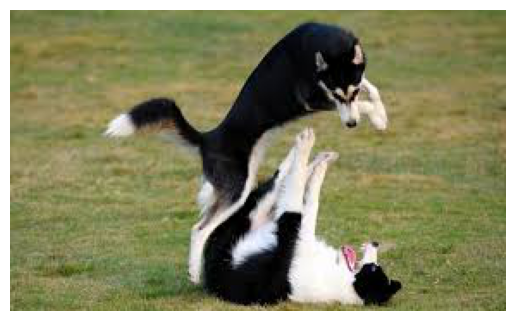

Image: 1.jpg

Final caption:

startseq two dogs are running through the grass endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Image: 2.jpg

Final caption:

startseq two dogs are running through the grass endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Image: 3.jpg

Final caption:

startseq two dogs are playing in the water endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Image: 49553964_cee950f3ba.jpg

Final caption:

startseq man in hooded wetsuit is riding on the beach endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


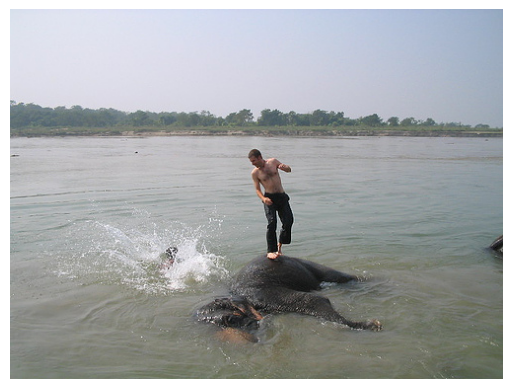

Image: 53043785_c468d6f931.jpg

Final caption:

startseq dog is standing in the water endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Image: 54501196_a9ac9d66f2.jpg

Final caption:

startseq man stands on mountain endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Image: 54723805_bcf7af3f16.jpg

Final caption:

startseq skier is standing on mountain endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


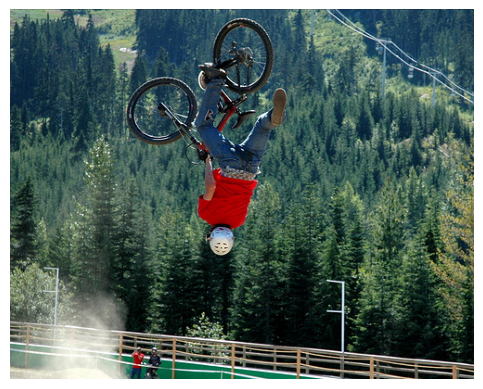

Image: 55135290_9bed5c4ca3.jpg

Final caption:

startseq man riding bicycle on skateboard endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


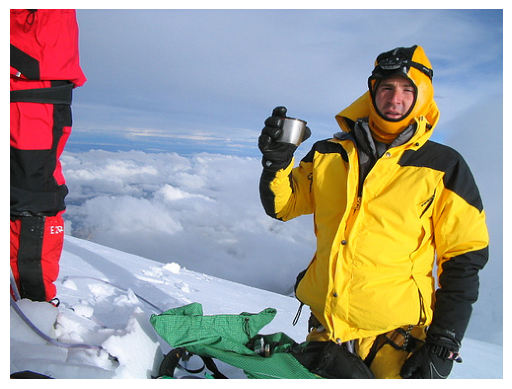

Image: 55470226_52ff517151.jpg

Final caption:

startseq man stands on dirt hill with mountains in background endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Image: 55473406_1d2271c1f2.jpg

Final caption:

startseq man in red jacket is standing on dirt hill endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Image: 56489627_e1de43de34.jpg

Final caption:

startseq man stands on dirt hill with mountains in background endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


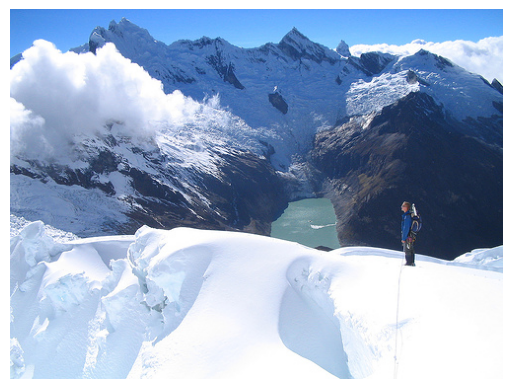

Image: 56494233_1824005879.jpg

Final caption:

startseq skier is standing on dirt hill endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


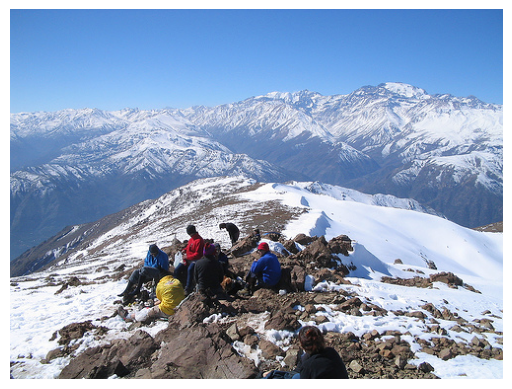

Image: 57417274_d55d34e93e.jpg

Final caption:

startseq man stands on dirt hill with mountains in background endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


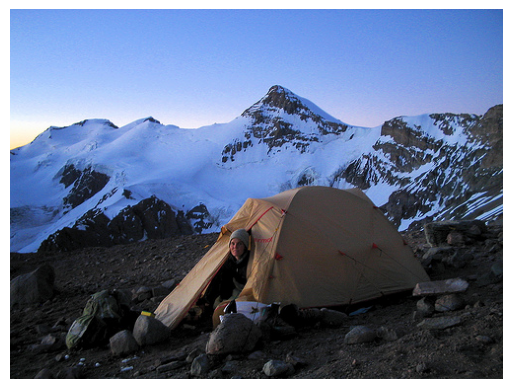

Image: 57422853_b5f6366081.jpg

Final caption:

startseq two dogs are pulling their way through the snow endseq


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Image: dog.jpg

Final caption:

startseq two dogs are running through the grass endseq




In [113]:

# Load tokenizer and model
tokenizer = load(open("tokenizer.p", "rb"))
model = load_model('models/model_embed26.keras')

# Load Xception model for feature extraction
xception_model = Xception(include_top=False, pooling="avg")

test_images_dir = 'test_images/'

# Extract features from the input image
for filename in os.listdir(test_images_dir):
    #print(filename)
    if filename.endswith('.jpg'):
        img_path = os.path.join(test_images_dir, filename)
        
        # Extract features from the input image
        photo = extract_features(img_path, xception_model)
        if photo is not None:
            # Generate description for the image
            description = generate_desc(model, tokenizer, photo, max_length)

            # Display the image
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            print(f"Image: {filename}\n")
            print("Final caption:\n")
            print(description)
            print("\n" + "="*50 + "\n")
        else:
            print(f"Feature extraction failed for image: {filename}")

# conclusion :  
### 1. More Iteration is needed to improve the accuracy
### 2. May be after 50 iterations, this model will start performing well. 
### 3. compared to NLP this result is good considering the laptop it has been trained on and time constraints. 